<a href="https://colab.research.google.com/github/tuftsdatalab/python-geoprocessing/blob/main/Demos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wrangling Spatial Data with Python Demos
Presented by Chad Fisher, Geospatial Data Science Specialist, TTS Research Technology

11.6.24

Workshop Slides: https://tufts.box.com/v/Python-Geoprocessing-Slides

When collecting data for a project, it can get messy to find and download data, get it all into the same projection, and get everything down to the same extent. Today, we'll walk through some example data you might find out in the world and the steps you need to make it ready for GIS.

# Geo-coding and Reverse Geo-coding: The MA Ice Cream Trail

There are many different ways to geocode in python, including different packages and different providers, which can lead to many combinations of possibility. If it's not working in one, you can always try another!

The main package is GeoPy. It can access many different geocoding providers (the software that actually does the geocoding) and is a simple collection of all the different calls you'd have to make to each service.

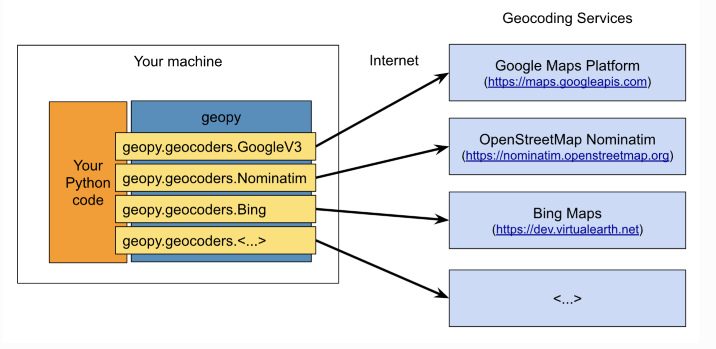

For a full list of available geocoders, see the [documentation](https://geopy.readthedocs.io/en/stable/#module-geopy.geocoders). The ArcGIS REST API is one of the available geocoders, but we'll use OSM's Nominatim because it is usually accurate enough for demonstration purposes.

In [1]:
# Call the package into your current session using import
import geopy

In [2]:
# Give your geolocator a user_agent name:
geolocator = geopy.geocoders.Nominatim(user_agent="my-geocoder")

In [3]:
# For example let's get Tufts University
location = geolocator.geocode("Tufts University")

In [5]:
# What does the returned data look like?
location.raw

{'place_id': 17891428,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
 'osm_type': 'relation',
 'osm_id': 3567946,
 'lat': '42.40649125',
 'lon': '-71.11800725402092',
 'class': 'amenity',
 'type': 'university',
 'place_rank': 30,
 'importance': 0.5799239749427912,
 'addresstype': 'amenity',
 'name': 'Tufts University',
 'display_name': 'Tufts University, Simpson Avenue, West Somerville, Ball Square, Somerville, Middlesex County, Massachusetts, 02144, United States',
 'boundingbox': ['42.4013792', '42.4114992', '-71.1251199', '-71.1105811']}

In [6]:
location

Location(Tufts University, Simpson Avenue, West Somerville, Ball Square, Somerville, Middlesex County, Massachusetts, 02144, United States, (42.40649125, -71.11800725402092, 0.0))

In [7]:
# Here's another example:
location2 = geolocator.geocode("Franklin Park, Boston")
location2

Location(Franklin Park, Roxbury, Boston, Suffolk County, Massachusetts, United States, (42.30317145, -71.09460692605415, 0.0))

To reverse geocode, you do the opposite!

In [30]:
reverse=geolocator.reverse("42.30317145, -71.09460692605415")
reverse

Location(Schoolmaster Hill, Jewish War Veterans Drive, Roxbury, Boston, Suffolk County, Massachusetts, 02130, United States, (42.3030524, -71.09569100015369, 0.0))

**Try your own location!**

In [ ]:
# Try your own location
location3 = geolocator.geocode("???")
location3

## Batch geocoding

Let's get a list of addresses I've compiled and try to geocode a table of data! I took the data from the [MA Ice Cream Trail](https://www.visitma.com/wp-content/uploads/2024/07/MA-Ice-Cream-Trail.pdf) and added the addresses, but there's not coordinate info. There's a few different ways to proceed:
1. We could go to google maps and enter each address and copy paste the coordinates
2. We could use a for loop to geocode all the addresses systematically
3. **Or we could use the built-in convencience function in GeoPandas!**

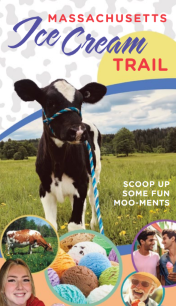

In [8]:
# Get the spreadsheet that I've prepared from Box
!wget https://tufts.box.com/shared/static/eg0zloro9ikv5pp9bzio1ld8q18qewls.xlsx -O Addresses_for_geocoding.xlsx

--2024-10-29 20:17:05--  https://tufts.box.com/shared/static/eg0zloro9ikv5pp9bzio1ld8q18qewls.xlsx
Resolving tufts.box.com (tufts.box.com)... 74.112.186.157
Connecting to tufts.box.com (tufts.box.com)|74.112.186.157|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/eg0zloro9ikv5pp9bzio1ld8q18qewls.xlsx [following]
--2024-10-29 20:17:06--  https://tufts.box.com/public/static/eg0zloro9ikv5pp9bzio1ld8q18qewls.xlsx
Reusing existing connection to tufts.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://tufts.app.box.com/public/static/eg0zloro9ikv5pp9bzio1ld8q18qewls.xlsx [following]
--2024-10-29 20:17:06--  https://tufts.app.box.com/public/static/eg0zloro9ikv5pp9bzio1ld8q18qewls.xlsx
Resolving tufts.app.box.com (tufts.app.box.com)... 74.112.186.157
Connecting to tufts.app.box.com (tufts.app.box.com)|74.112.186.157|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: ht

Remember Pandas? The package for organizaing data into dataframes?

In [9]:
# Import Pandas (lots of people abbreviate it as pd)
import pandas as pd

In [10]:
# Read the Excel data as a Pandas dataframe
my_data=pd.read_excel('Addresses_for_geocoding.xlsx')
my_data

,Store Name,Address,Phone,Website,Type
0,Boston Children’s Museum Hood Milk Bottle,"308 Congress Street, Boston, MA 02210",617-426-6500,https://bostonchildrensmuseum.org/,Ice cream stand/shop
1,Bubbling Brook,"1652 High Street (Route 109) Westwood, MA 02090",781-762-9860,https://www.bubblingbrook.net/,Ice cream stand/shop
2,Cabot’s Ice Cream & Restaurant,"743 Washington Street, Newton, MA 02460",617-964-9200,https://www.cabots.com/,Ice cream stand/shop
3,Celebrity Pizza & Dairy Bar,"684 Mt. Auburn Street, Watertown, MA 02472",617-924-0009,https://celebritypizzainc.com/,Ice cream stand/shop
4,Colleen’s Ice Cream and Sandwich Shop,"61 High Street, Medford, MA 02155",781-395-8100,https://colleensmedford.com/index.html,Ice cream stand/shop
...,...,...,...,...,...
100,North Hadley Sugar Shack and Market,"181 River Drive, Hadley, MA 01035",413-585-8820,https://www.northhadleysugarshack.com/,Ice cream stand/shop
101,Rice Fruit Farm,"757 Main Street, Wilbraham, MA 01095",413-596-4002,https://www.ricefruitfarm.com/,Ice cream stand/shop
102,Rondeau’s Dairy Bar,"1300 Ware Road, Palmer, MA 01069",413-284-0068,NaN,Ice cream stand/shop
103,The Apple Place,"540 Somers Road, East Longmeadow, MA 01028",413-348-9628,https://www.theappleplace.net/,Ice cream stand/shop


**What are examples of the fields/attributs in this data?**

In [ ]:
# We can extract a single location from our dataframe by indexing
my_data.loc[2,'Address']

'743 Washington Street, Newton, MA 02460'

The 2 means the second row and the 'Address' tells us which field to get data from!

In [ ]:
# and geocode it
location = geolocator.geocode(my_data.loc[2,'Address'])

In [ ]:
# Did it work?
location.raw

{'place_id': 381889618,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 214734449,
 'lat': '42.35241285',
 'lon': '-71.20399750069025',
 'class': 'building',
 'type': 'retail',
 'place_rank': 30,
 'importance': 6.182269016551489e-05,
 'addresstype': 'building',
 'name': '',
 'display_name': '743, Washington Street, Newtonville, Newton, Middlesex County, Massachusetts, 02460, United States',
 'boundingbox': ['42.3523476', '42.3524918', '-71.2041282', '-71.2038385']}

We can also call specific attributes of the returned data like *latitude* and *longitude*

In [ ]:
location.latitude

42.35241285

In [ ]:
location.longitude

-71.20399750069025

Now let's import geopandas because it has a great function that can batch geocode all of a Pandas dataframe using GeoPy! It works the same way we just saw, but it has the **added convenience of returning the data as a GeoDataFrame** which is the format we need everything in for downloading files for a GIS or doing any geoprocessing in python!

In [12]:
import geopandas as gpd

In [13]:
# We can use the geocode tool to geocode the addresses from our data
# The provider is the same OSM nominatim and the timeout is set to 10 seconds
# (this is how long the script will wait to hear back from the geocoding service before an error is produced)
my_addresses=gpd.tools.geocode(my_data['Address'],provider='nominatim', user_agent="my-geocoder",timeout=10)
my_addresses

/usr/local/lib/python3.10/dist-packages/geopandas/geoseries.py:860: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


,geometry,address
0,POINT (-71.0499 42.35147),"308, Congress Street, Seaport, South Boston, B..."
1,POINT EMPTY,None
2,POINT (-71.204 42.35241),"743, Washington Street, Newtonville, Newton, M..."
3,POINT (-71.15613 42.37262),"Celebrity Pizza and Dairy Bar, 684, Mount Aubu..."
4,POINT (-71.1099 42.41825),"High Street, Medford Square, Medford, Middlese..."
...,...,...
100,POINT (-72.58468 42.37898),"North Hadley Sugar Shack, 181, River Drive, No..."
101,POINT (-72.43602 42.10389),"757, Main Street, Mileoak Corner, Wilbraham, H..."
102,POINT (-72.31941 42.17782),"Ware Road, Palmer Center, Palmer, Hampden Coun..."
103,POINT (-72.47936 42.04933),"540, Somers Road, Baptist Village, East Longme..."


Looks like our second address returned no results. How can I tell?

But I can't see all the rows!

In [21]:
# Check if any other addresses have problems
my_addresses[my_addresses.geometry.is_empty]

/usr/local/lib/python3.10/dist-packages/geopandas/geoseries.py:860: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


,geometry,address
1,POINT EMPTY,None
19,POINT EMPTY,None
20,POINT EMPTY,None
32,POINT EMPTY,None
68,POINT EMPTY,None
91,POINT EMPTY,None


Let's look closer at the first address with an issue!

In [22]:
my_data.loc[1,'Address']

'1652 High Street (Route 109) Westwood, MA 02090'

I bet it's the (Route 109) that is throwing things off. What if we just removed it?

In [23]:
location4 = geolocator.geocode("1652 High Street, Westwood, MA 02090")

In [24]:
location4

Location(1652, High Street, Westwood, Norfolk County, Massachusetts, 02062, United States, (42.2014475, -71.24985345754007, 0.0))

Much better! Let's replace it in our original dataset before geocoding!

In [25]:
# Replace the address with the correct version (this could also be done with string indexing)
my_data.loc[1,'Address']="1652 High Street, Westwood, MA 02090"

In [ ]:
# Geocode again
my_addresses=gpd.tools.geocode(my_data['Address'],provider='nominatim', user_agent="my-geocoder",timeout=10)
my_addresses

/usr/local/lib/python3.10/dist-packages/geopandas/geoseries.py:860: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


,geometry,address
0,POINT (-71.0499 42.35147),"308, Congress Street, Seaport, South Boston, B..."
1,POINT (-71.24985 42.20145),"1652, High Street, Westwood, Norfolk County, M..."
2,POINT (-71.204 42.35241),"743, Washington Street, Newtonville, Newton, M..."
3,POINT (-71.15624 42.37261),"684, Mount Auburn Street, Mount Auburn, East W..."
4,POINT (-71.11948 42.42075),"High Street, Medford Square, Medford, Middlese..."
...,...,...
100,POINT (-72.58468 42.37898),"North Hadley Sugar Shack, 181, River Drive, No..."
101,POINT (-72.43602 42.10389),"757, Main Street, Mileoak Corner, Wilbraham, H..."
102,POINT (-72.31941 42.17782),"Ware Road, Palmer Center, Palmer, Hampden Coun..."
103,POINT (-72.47936 42.04933),"540, Somers Road, Baptist Village, East Longme..."


Let's combine the input attribute data with these coordinates info.

In [27]:
# You can use the concat function to combine the 2 dataframes by the row axis (1)
my_addresses_final=pd.concat([my_data,my_addresses],axis=1)
my_addresses_final

,Store Name,Address,Phone,Website,Type,geometry,address
0,Boston Children’s Museum Hood Milk Bottle,"308 Congress Street, Boston, MA 02210",617-426-6500,https://bostonchildrensmuseum.org/,Ice cream stand/shop,POINT (-71.0499 42.35147),"308, Congress Street, Seaport, South Boston, B..."
1,Bubbling Brook,"1652 High Street, Westwood, MA 02090",781-762-9860,https://www.bubblingbrook.net/,Ice cream stand/shop,POINT EMPTY,None
2,Cabot’s Ice Cream & Restaurant,"743 Washington Street, Newton, MA 02460",617-964-9200,https://www.cabots.com/,Ice cream stand/shop,POINT (-71.204 42.35241),"743, Washington Street, Newtonville, Newton, M..."
3,Celebrity Pizza & Dairy Bar,"684 Mt. Auburn Street, Watertown, MA 02472",617-924-0009,https://celebritypizzainc.com/,Ice cream stand/shop,POINT (-71.15613 42.37262),"Celebrity Pizza and Dairy Bar, 684, Mount Aubu..."
4,Colleen’s Ice Cream and Sandwich Shop,"61 High Street, Medford, MA 02155",781-395-8100,https://colleensmedford.com/index.html,Ice cream stand/shop,POINT (-71.1099 42.41825),"High Street, Medford Square, Medford, Middlese..."
...,...,...,...,...,...,...,...
100,North Hadley Sugar Shack and Market,"181 River Drive, Hadley, MA 01035",413-585-8820,https://www.northhadleysugarshack.com/,Ice cream stand/shop,POINT (-72.58468 42.37898),"North Hadley Sugar Shack, 181, River Drive, No..."
101,Rice Fruit Farm,"757 Main Street, Wilbraham, MA 01095",413-596-4002,https://www.ricefruitfarm.com/,Ice cream stand/shop,POINT (-72.43602 42.10389),"757, Main Street, Mileoak Corner, Wilbraham, H..."
102,Rondeau’s Dairy Bar,"1300 Ware Road, Palmer, MA 01069",413-284-0068,NaN,Ice cream stand/shop,POINT (-72.31941 42.17782),"Ware Road, Palmer Center, Palmer, Hampden Coun..."
103,The Apple Place,"540 Somers Road, East Longmeadow, MA 01028",413-348-9628,https://www.theappleplace.net/,Ice cream stand/shop,POINT (-72.47936 42.04933),"540, Somers Road, Baptist Village, East Longme..."


The great thing about GeoPandas dataframes is you can export to any of the vector data formats we talked about earlier!

Let's export to geojson for this example. You could easily open it in ArcGIS Pro with the JSON to Features tool.

In [28]:
my_addresses.to_file('ice_cream_shops.geojson')

You can download this from your files in colab and then do whatever with it!

## Optional: Fixing other addresses in the dataset

In [26]:
# For the 5 other problematic addresses, figure out what is wrong with the formatting by looking at the addresses from my_data
# Hint: use the row numbers from my_addresses[my_addresses.geometry.is_empty]

# Try fixing the addresses and geocoding it to see if you can get it to work

# Replace the addresses in my_data and regeocode


## Section Review Questions

* T/F: GeoPy is a geocoding provider
* What is the difference between reverse geocoding and geocoding?

# Pre-processing Vector Data: Internet Access at Boston Bus Stops

In this section we will get vector data of different formats, projections, and extents and process them all to be the same format, projection, and extent. **This is a key first step in any project!**

For this workshop, we are going to use data you might want to use to understand internet access around MBTA bus stops in Boston. This could include data on 5G networks and free Wi-Fi.

## Getting data

Let's get some example vector data:
1. Boston city boundary (Shapefile directly from internet)
2. Free Wi-Fi locations in Boston from Analyze Boston (GeoJSON from internet)
3. MBTA bus routes (Shapefile as a zip file)
4. FCC data on 5G data availability (Shapefile you have to upload)

Geopandas is also awesome because you can read data directly from websites!

Let me show you how I got these links: https://data.boston.gov/dataset/city-of-boston-outline-boundary-water-excluded

In [31]:
# Boston city boundary as a GeoDataFrame
Boston=gpd.read_file('https://bostonopendata-boston.opendata.arcgis.com/api/download/v1/items/142500a77e2a4dbeb94a86f7e0b568bc/shapefile?layers=9')

In [32]:
# Free Wi-Fi locations in Boston
WiFi=gpd.read_file('https://bostonopendata-boston.opendata.arcgis.com/api/download/v1/items/6a7a0ab4e964471f819d40078b17e7fa/geojson?layers=0')

Sometimes you have the data downloaded as a zip or the zip file contains multiple layers. In this case, you have to download it and unzip it before reading the file into GeoPandas.

In [33]:
!wget https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/mbtabus.zip

--2024-10-29 20:33:42--  https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/mbtabus.zip
Resolving s3.us-east-1.amazonaws.com (s3.us-east-1.amazonaws.com)... 52.217.46.46, 16.15.185.110, 54.231.134.0, ...
Connecting to s3.us-east-1.amazonaws.com (s3.us-east-1.amazonaws.com)|52.217.46.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7821863 (7.5M) [application/x-zip-compressed]
Saving to: ‘mbtabus.zip’

mbtabus.zip         100%[===================>]   7.46M  1.47MB/s    in 10s     

2024-10-29 20:33:53 (732 KB/s) - ‘mbtabus.zip’ saved [7821863/7821863]



In [34]:
import zipfile
zipfile.ZipFile('mbtabus.zip').extractall()

In [37]:
MBTA=gpd.read_file('mbtabus/MBTABUSSTOPS_PT.shp')

Still other times you have data downloaded on your computer and need to upload it into Colab to use it. Download the [FCC data](https://broadbandmap.fcc.gov/data-download/nationwide-data?version=dec2023) and upload it to your runtime.

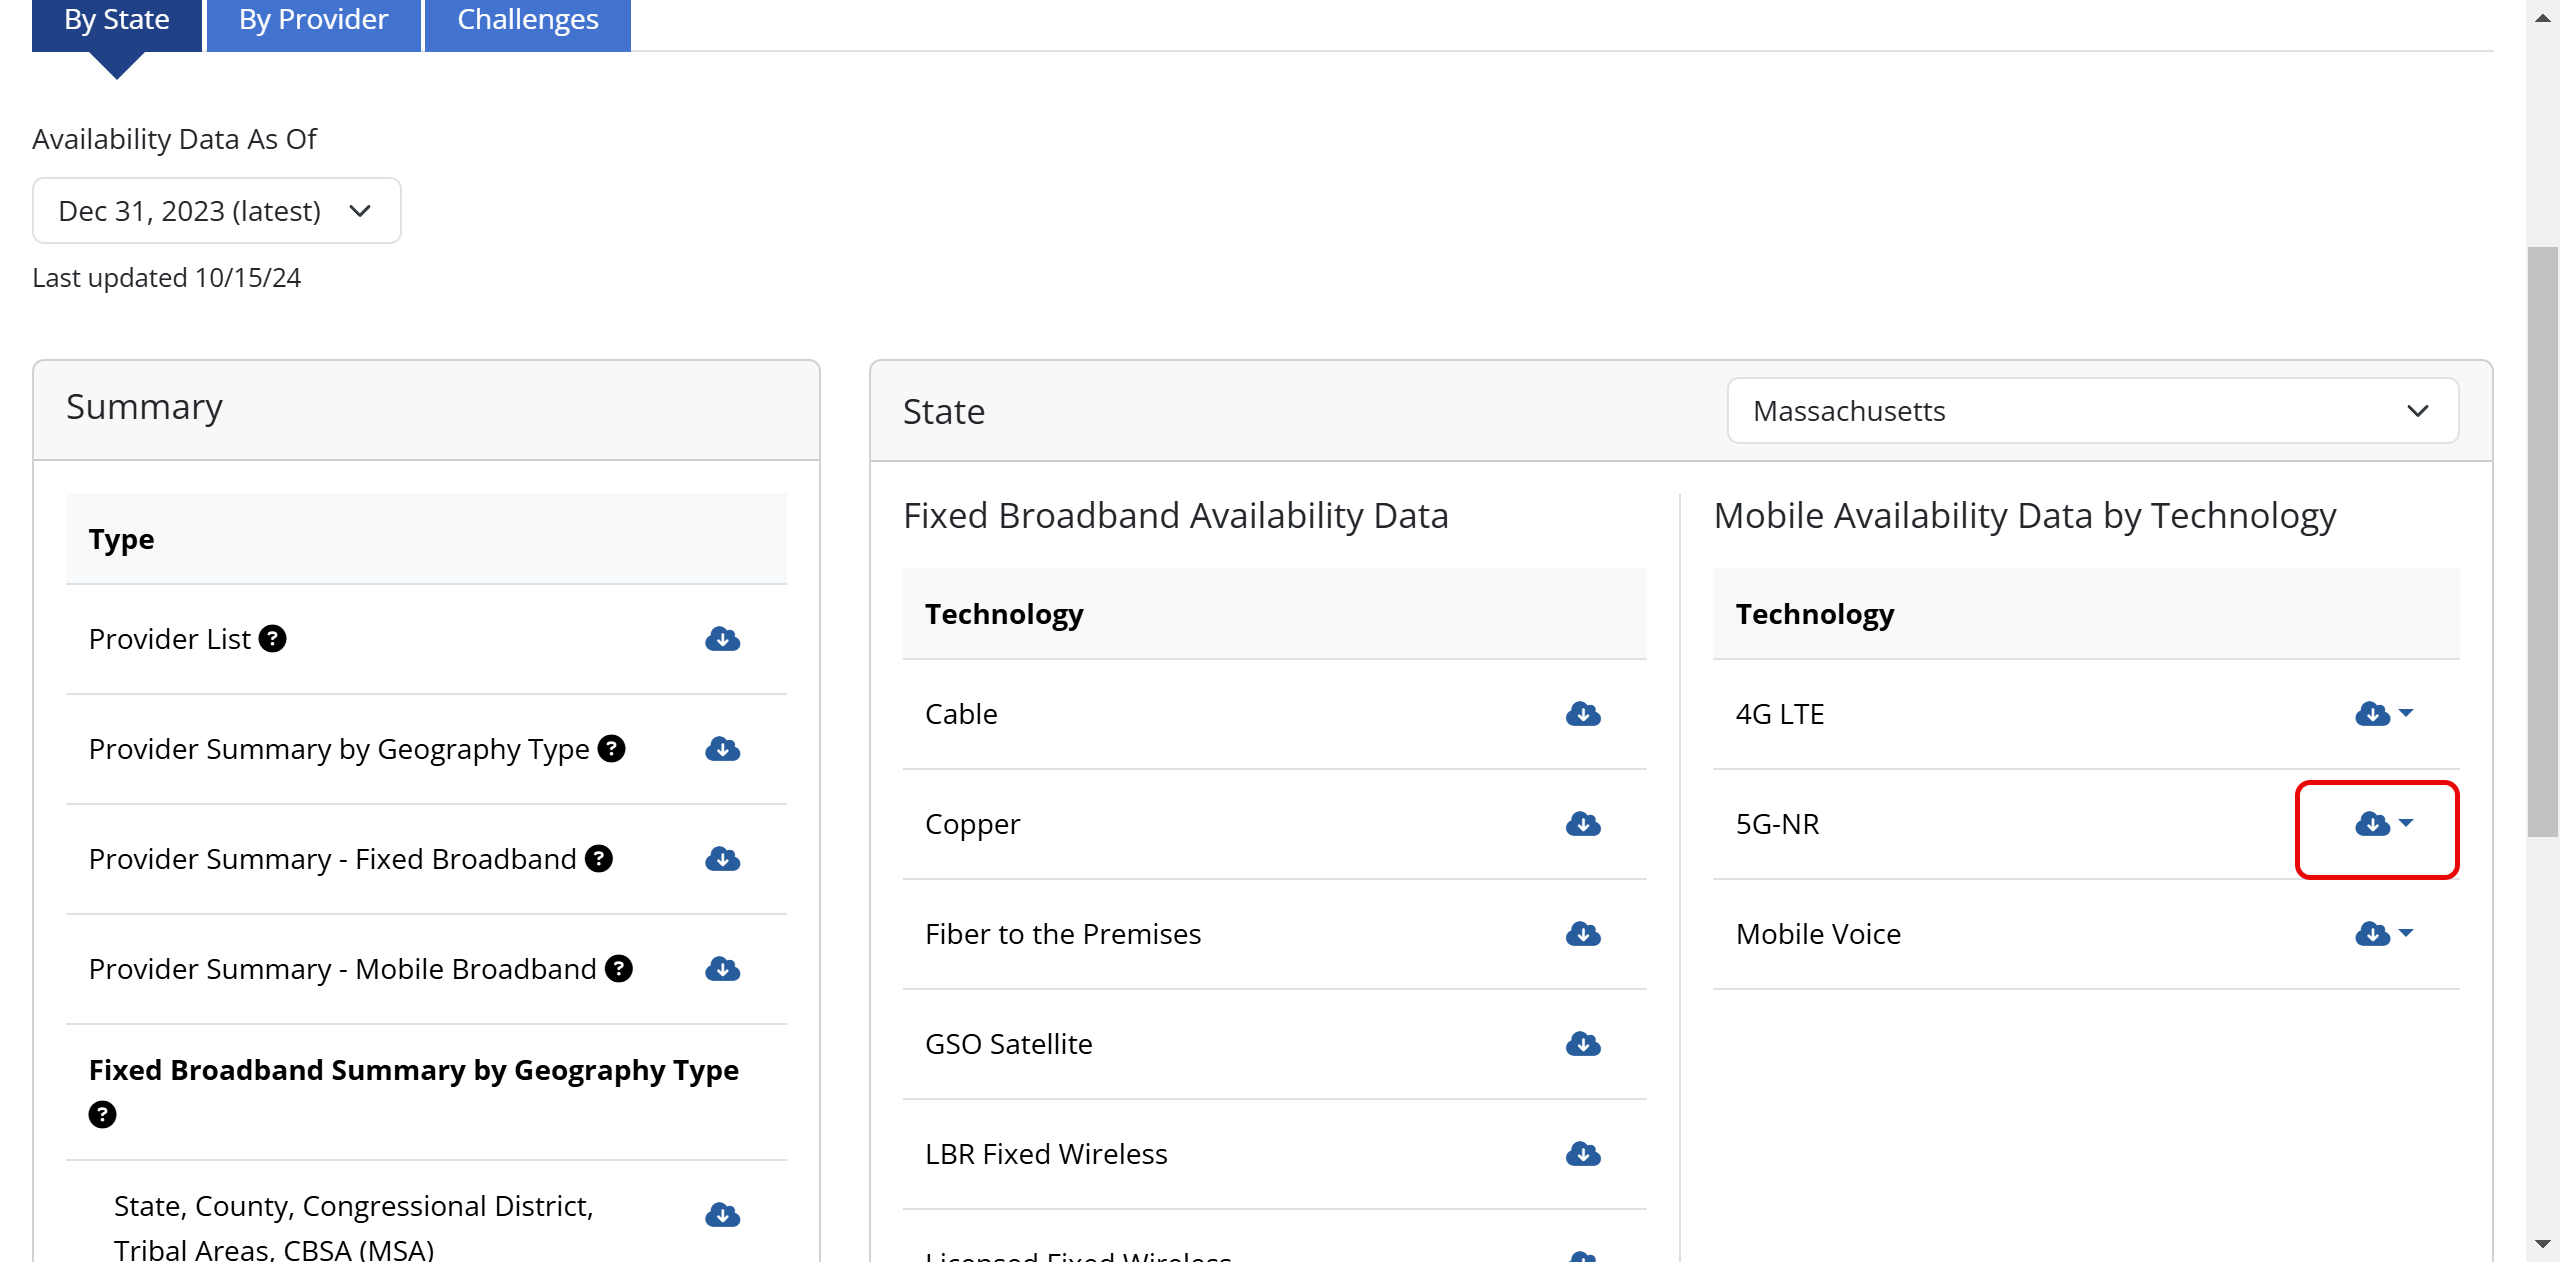

In [35]:
FCC=gpd.read_file('bdc_25_5GNR_mobile_broadband_h3_D23_15oct2024.zip')

Let's see what all this data looks like!

<Axes: >

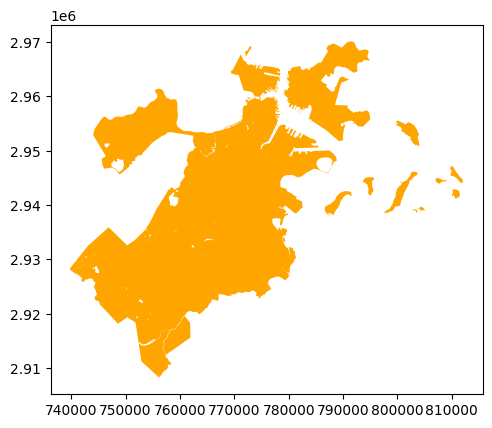

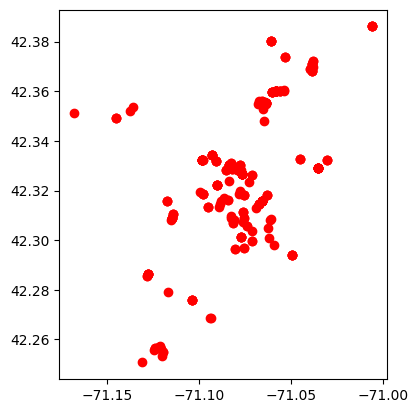

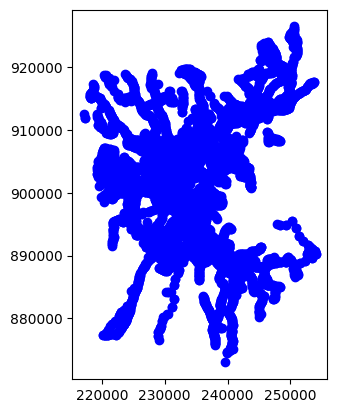

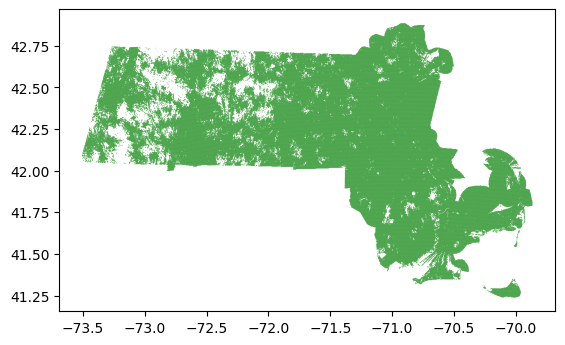

In [39]:
Boston.plot(color='orange')
WiFi.plot(color='red')
MBTA.plot(color='blue')
FCC.plot(color='green')

**What do you notice about the data? Are they all the same extent? Are they all the same type of vector data? What do you think those numbers on the axes mean?**

Some of the data is statewide. Another is only for the city of Boston. And MBTA routes are at yet a third scale. It also looks like there are 3 different projections in the datasets!

## Clipping data

Let's clip all our data to Boston. But first we have to fix the projections of our data.

In [40]:
# For any GeoDataFrame, no matter what geometry type, size, or source, you can always call .crs to find the coordinate system
Boston.crs

<Projected CRS: EPSG:2249>
Name: NAD83 / Massachusetts Mainland (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [41]:
WiFi.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [42]:
MBTA.crs

<Projected CRS: EPSG:26986>
Name: NAD83 / Massachusetts Mainland
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (meter)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [43]:
FCC.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**Are all of these datasets projected? Which ones are not?**

Let's reproject all our data to be the same projection as the Boston boundary data:

In [45]:
# It is often easiest to just let the code figure out what the output projection should be instead of calling it explicitly!
WiFi=WiFi.to_crs(Boston.crs)
MBTA=MBTA.to_crs(Boston.crs)
FCC=FCC.to_crs(Boston.crs)

And now we can clip the data:

In [46]:
# Do we need to clip the Wifi data?
MBTA=MBTA.clip(Boston)
FCC=FCC.clip(Boston)

<Axes: >

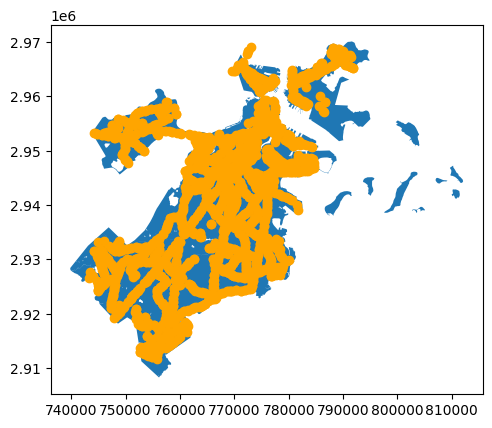

In [47]:
# To check if this worked, we can map the Boston data under any of the other datasets
ax=Boston.plot()
MBTA.plot(ax=ax,color='orange')

<Axes: >

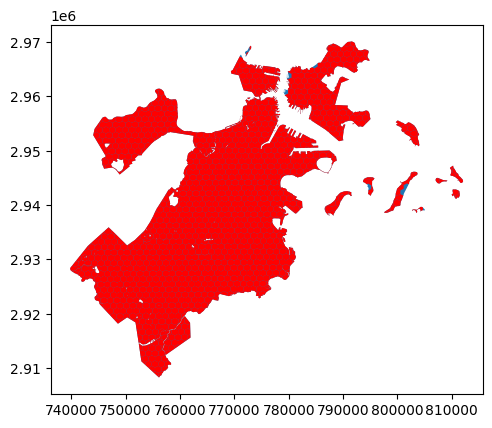

In [48]:
ax=Boston.plot()
FCC.plot(ax=ax,color='red')

## Optional: Downloading data

Now we can export our processed data to whatever format we want. This could be a GeoJSON or a shapefile or whatever format you need.

In [50]:
# If we wanted to export directly to a shapefile, it would be a good idea to make a folder first. Why?
# mkdir makes a directory (folder) names WiFi_data
!mkdir WiFi_data

In [51]:
# Export data to that folder. You can download all of your resulting shapefiles as a single zip folder
WiFi.to_file('WiFi_data/WiFi.shp')
FCC.to_file('WiFi_data/FCC_5G.shp')
MBTA.to_file('WiFi_data/MBTA_BusStops.shp')

<ipython-input-51-2fdfb2aeae4d>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  WiFi.to_file('WiFi_data/WiFi.shp')
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'neighborhood_id' to 'neighborho'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'neighborhood_name' to 'neighbor_1'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'device_serial' to 'device_ser'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'device_connectedto' to 'device_con'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'device_address' to 'device_add'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogri

**Wait what do all those warnings mean?**

In [53]:
# Remember that shapefiles have field length limits, but other formats like geojsons don't.
# It's important to understand the different advantages of spatial data formats!
FCC.to_file('FCC_5G.geojson')

## Section Review Questions

* What are some ways you can tell the projection of a GeoDataFrame in python?
* What are some ways data can be read into GeoPandas?

# Pre-processing Raster Data: Maine Wind Turbines

Raster data can get tricky no matter where you are working with it. Sometimes you've got a lot of data that all has different cell sizes, projections, extents, and bands that you need to work with. Sometimes you have tiles you need to merge. Packages like RaserIO are super helpful here!

For this example, let's get some simple data we might need to think about where to locate a new Wind Turbine in Maine.

Let's get some example raster data:
1. Wind Speed Data (needs to be clipped and reprojected)
2. (needs to have a different cell size)
3. (needs to be tiled)

In [54]:
!wget 'https://globalwindatlas3.s3-eu-west-1.amazonaws.com/country_tifs/USA_wind-speed_10m.tif'

--2024-10-29 20:55:55--  https://globalwindatlas3.s3-eu-west-1.amazonaws.com/country_tifs/USA_wind-speed_10m.tif
Resolving globalwindatlas3.s3-eu-west-1.amazonaws.com (globalwindatlas3.s3-eu-west-1.amazonaws.com)... 52.92.19.130, 52.218.61.80, 52.218.37.27, ...
Connecting to globalwindatlas3.s3-eu-west-1.amazonaws.com (globalwindatlas3.s3-eu-west-1.amazonaws.com)|52.92.19.130|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 702896032 (670M) [image/tiff]
Saving to: ‘USA_wind-speed_10m.tif’

USA_wind-speed_10m. 100%[===================>] 670.33M  18.7MB/s    in 40s     

2024-10-29 20:56:36 (16.8 MB/s) - ‘USA_wind-speed_10m.tif’ saved [702896032/702896032]



In [55]:
pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 59.4 MB/s eta 0:00:00


In [56]:
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask
from rasterio.merge import merge
from rasterio.enums import Resampling
from rasterio.warp import calculate_default_transform, reproject, Resampling

In [57]:
import geopandas as gpd

In [58]:
NE_States=gpd.read_file('https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/ne/newengland.zip')

In [59]:
Maine=NE_States[NE_States['NAME']=='MAINE']

<Axes: >

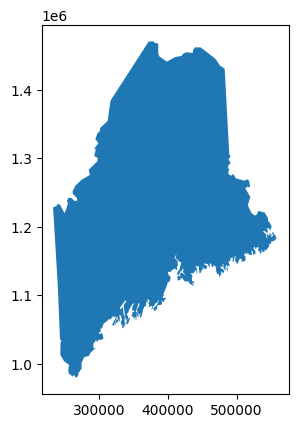

In [67]:
Maine.plot()

In [61]:
# Mask windspeed data
with rio.open('/content/USA_wind-speed_10m.tif') as src:
    out_meta = src.meta
    out_image, out_transform = rio.mask.mask(src, shapes=Maine.to_crs(4326).geometry, crop=True)


    profile = src.profile
    profile["height"] = out_image.shape[1]
    profile["width"] = out_image.shape[2]
    profile["transform"] = out_transform


    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rio.open("wind2023_ME.tif", "w", **out_meta) as dest:
    dest.write(out_image)

#Reproject windspeed data
dst_crs = 'EPSG:32619'

with rio.open('wind2023_ME.tif') as src:

    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })
    with rio.Env(CHECK_DISK_FREE_SPACE="NO"):
        with rio.open('/content/WindSpeed_ME_Reprojected.tif', 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rio.band(src, i),
                    destination=rio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest)


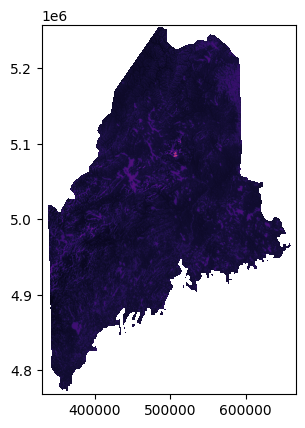

<Axes: >

In [63]:
# Lighter colors indicate higher average wind speeds!
show(rio.open('/content/WindSpeed_ME_Reprojected.tif'),cmap='magma')

DEM Tiles

In [ ]:
!wget https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1m/Projects/ME_SouthCoastal_2020_A20/TIFF/USGS_1M_19_x39y484_ME_SouthCoastal_2020_A20.tif

--2024-10-28 19:21:07--  https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1m/Projects/ME_SouthCoastal_2020_A20/TIFF/USGS_1M_19_x39y484_ME_SouthCoastal_2020_A20.tif
Resolving prd-tnm.s3.amazonaws.com (prd-tnm.s3.amazonaws.com)... 52.92.187.89, 52.218.237.91, 52.92.188.97, ...
Connecting to prd-tnm.s3.amazonaws.com (prd-tnm.s3.amazonaws.com)|52.92.187.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 396916782 (379M) [image/tiff]
Saving to: ‘USGS_1M_19_x39y484_ME_SouthCoastal_2020_A20.tif’

USGS_1M_19_x39y484_ 100%[===================>] 378.53M  16.1MB/s    in 25s     

2024-10-28 19:21:33 (14.9 MB/s) - ‘USGS_1M_19_x39y484_ME_SouthCoastal_2020_A20.tif’ saved [396916782/396916782]



In [ ]:
import glob

In [ ]:
# Mosaic DEM tiles
DEM_list=glob.glob('/content/USGS*.tif')
src_files_to_mosaic = []
for fp in DEM_list:
  src = rio.open(fp)
  src_files_to_mosaic.append(src)
mosaic, out_trans = merge(src_files_to_mosaic)
out_meta = src.meta.copy()
out_meta.update({"driver": "GTiff",
"height": mosaic.shape[1],
"width": mosaic.shape[2],"transform": out_trans,"crs": "+proj=longlat +datum=WGS84 +no_defs"})

with rio.open("mosaic.tif", "w", **out_meta) as dest:
    dest.write(mosaic)

In [ ]:
DEM=rio.open('mosaic.tif')

In [ ]:
DEM=rio.open('/content/USGS_1M_19_x39y484_ME_SouthCoastal_2020_A20.tif')

In [ ]:
DEM

<open DatasetReader name='/content/USGS_1M_19_x39y484_ME_SouthCoastal_2020_A20.tif' mode='r'>

In [ ]:
DEM.crs

CRS.from_epsg(26919)

In [ ]:
DEM.read(1)

array([[51.52993  , 51.66295  , 51.78202  , ..., 10.4387865, 10.457841 ,
        10.449153 ],
       [51.563786 , 51.661964 , 51.737995 , ..., 10.429168 , 10.452251 ,
        10.457103 ],
       [51.55308  , 51.604965 , 51.64604  , ..., 10.422083 , 10.439016 ,
        10.451109 ],
       ...,
       [10.19195  , 10.163172 , 10.128601 , ..., 31.733416 , 31.567013 ,
        31.403996 ],
       [10.175991 , 10.158091 , 10.13997  , ..., 31.714598 , 31.542425 ,
        31.372389 ],
       [10.203241 , 10.186566 , 10.166152 , ..., 31.7936   , 31.625772 ,
        31.437849 ]], dtype=float32)

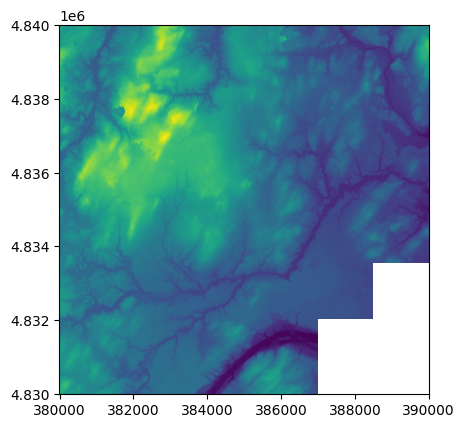

<Axes: >

In [ ]:
ax=show(DEM)
Maine.boundary.plot(ax=ax)

# Stretch: Calling APIs

## What is an API?

An API, or application programming interface, is a standardized method for communicating between applications. For our purposes, they are structured ways to access data online. To read more about APIs, visit this resource from [Amazon](https://aws.amazon.com/what-is/api/)

## Packages used

We can use two packages **census** and **pygris** to access census data and geography data and join them much faster than if we had to download zipped data, extract it, clean it in Excel, bring into GIS, and join the data. The **us** package will help us in querying the Census API.

To make it easy to download and bring the data between python and other systems, we will use the open-source data format GeoJSON. If you want to use it in ArcGIS Pro, just run the tool JSON to Features to make the data usable. This will create a feature class or shapefile that you can then use. We don't want to use shapefiles directly here because they require a collection of files that can easily get lost in the process while GeoJSONs are single files with all the data and are often smaller!

In [ ]:
# install the needed packages
!pip install pygris census us

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 421.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.2/543.2 kB 17.3 MB/s eta 0:00:00


In [ ]:
# Import packages for downloading census data tables
from census import Census
from us import states
import pandas as pd

Get API key from Census website: https://api.census.gov/data/key_signup.html

In [ ]:
# Type your key in here:
c=Census('your key')

We'll get data from 3 different census tables:
1. B25003: data on renters and ownership
  * Let's specifically get variables B25003_001E, B25003_002E, B25003_003E
2. B06001: median income by place of birth
  * Let's specifically get variables B06001_001E, B06001_002E, B06001_003E, B06001_004E, and B06001_005E



You can see all of the variables included in the 2022 ACS5 relase from the census website [here](https://api.census.gov/data/2022/acs/acs5/variables.html).

In [ ]:
MA_census = c.acs5.state_county_tract(fields = ('NAME','GEO_ID','B25003_001E','B25003_002E','B25003_003E'
                                                ,'B06001_001E','B06001_002E','B06001_003E','B06001_004E','B06001_005E'),
                                      state_fips = states.MA.fips,
                                      county_fips = "*",
                                      tract = "*",
                                      year = 2022)

In [ ]:
MA_2022=pd.DataFrame(MA_census)
MA_2022.rename(columns={'B25003_001E': 'Total_Units',
                        'B25003_002E': 'Renter_Occupied',
                        'B25003_003E': 'Owner_Occupied',
                        'B06001_001E': 'Total_MedInc',
                        'B06001_002E': 'Born_in_State_MedInc',
                        'B06001_003E': 'Born_other_State_MedInc',
                        'B06001_004E': 'Native_born_else_MedInc',
                        'B06001_005E': 'Foreign_born_MedInc'}, inplace=True)

In [ ]:
MA_2022

,NAME,GEO_ID,Total_Units,Renter_Occupied,Owner_Occupied,Total_MedInc,Born_in_State_MedInc,Born_other_State_MedInc,Native_born_else_MedInc,Foreign_born_MedInc,state,county,tract
0,Census Tract 101; Barnstable County; Massachus...,1400000US25001010100,1996.0,1525.0,471.0,3630.0,116.0,184.0,121.0,330.0,25,001,010100
1,Census Tract 102.06; Barnstable County; Massac...,1400000US25001010206,1975.0,1696.0,279.0,4352.0,130.0,505.0,144.0,151.0,25,001,010206
2,Census Tract 102.08; Barnstable County; Massac...,1400000US25001010208,1031.0,862.0,169.0,1627.0,0.0,47.0,71.0,1.0,25,001,010208
3,Census Tract 103.04; Barnstable County; Massac...,1400000US25001010304,1363.0,1306.0,57.0,2739.0,42.0,230.0,154.0,149.0,25,001,010304
4,Census Tract 103.06; Barnstable County; Massac...,1400000US25001010306,1361.0,1233.0,128.0,2985.0,92.0,314.0,154.0,268.0,25,001,010306
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,Census Tract 7611; Worcester County; Massachus...,1400000US25027761100,2010.0,1311.0,699.0,4985.0,267.0,806.0,365.0,737.0,25,027,761100
1616,Census Tract 7612; Worcester County; Massachus...,1400000US25027761200,2234.0,1071.0,1163.0,6023.0,410.0,1002.0,263.0,902.0,25,027,761200
1617,Census Tract 7613; Worcester County; Massachus...,1400000US25027761300,1299.0,1004.0,295.0,3615.0,290.0,582.0,266.0,719.0,25,027,761300
1618,Census Tract 7614.01; Worcester County; Massac...,1400000US25027761401,1427.0,1384.0,43.0,4287.0,336.0,703.0,262.0,361.0,25,027,761401


In [ ]:
# Get census geography data
from pygris import tracts, utils
MA_tracts=tracts(cb=True,year=2022,cache=True,state='MA')

Using FIPS code '25' for input 'MA'


In [ ]:
# Remove water
MA_tracts=pygris.utils.erase_water(MA_tracts)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:2675: UserWarning: `keep_geom_type=True` in overlay resulted in 33 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


In [ ]:
MA_tracts

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,25,001,011300,1400000US25001011300,25001011300,113,Census Tract 113,MA,Barnstable County,Massachusetts,CT,13113156,556274,"MULTIPOLYGON (((-70.20602 41.74636, -70.19508 ..."
1,25,001,012601,1400000US25001012601,25001012601,126.01,Census Tract 126.01,MA,Barnstable County,Massachusetts,CT,3467385,9794,"POLYGON ((-70.33489 41.66014, -70.32629 41.663..."
2,25,001,013500,1400000US25001013500,25001013500,135,Census Tract 135,MA,Barnstable County,Massachusetts,CT,23627496,1422547,"MULTIPOLYGON (((-70.45763 41.73073, -70.45344 ..."
3,25,009,250100,1400000US25009250100,25009250100,2501,Census Tract 2501,MA,Essex County,Massachusetts,CT,852256,198746,"MULTIPOLYGON (((-71.16232 42.70985, -71.1618 4..."
4,25,009,250500,1400000US25009250500,25009250500,2505,Census Tract 2505,MA,Essex County,Massachusetts,CT,300558,3894,"POLYGON ((-71.16996 42.72037, -71.16874 42.719..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,25,017,352400,1400000US25017352400,25017352400,3524,Census Tract 3524,MA,Middlesex County,Massachusetts,CT,225079,0,"POLYGON ((-71.09628 42.36488, -71.09542 42.367..."
1609,25,025,060101,1400000US25025060101,25025060101,601.01,Census Tract 601.01,MA,Suffolk County,Massachusetts,CT,295623,0,"POLYGON ((-71.03128 42.33483, -71.02923 42.335..."
1610,25,025,091001,1400000US25025091001,25025091001,910.01,Census Tract 910.01,MA,Suffolk County,Massachusetts,CT,1186269,447567,"POLYGON ((-71.05888 42.31277, -71.05721 42.312..."
1611,25,017,363202,1400000US25017363202,25017363202,3632.02,Census Tract 3632.02,MA,Middlesex County,Massachusetts,CT,6166481,43773,"POLYGON ((-71.47984 42.49098, -71.47973 42.490..."


In [ ]:
# Join data to geography
MA_tracts_2022=MA_tracts.merge(MA_2022,left_on='AFFGEOID',right_on='GEO_ID')

<Axes: >

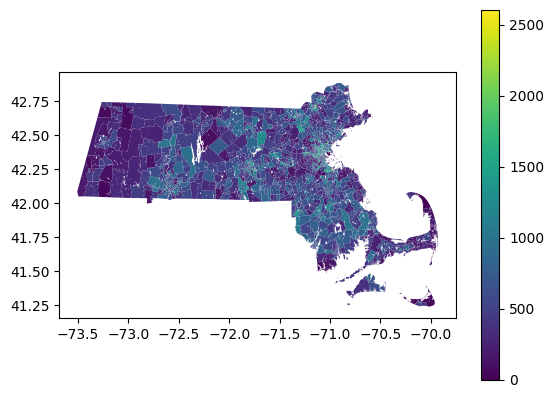

In [ ]:
MA_tracts_2022.plot(column='Foreign_born_MedInc', legend=True)

In [ ]:
MA_tracts_2022.to_file('MA_tracts_2022.geojson')